# "Covid Analysis"
> "The Pandemic's analysis and visualization
   By: AJ"
- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- image: images/chart_preview.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [1]:
#collapse
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from bokeh.plotting import output_notebook, figure, show
from bokeh.models import ColumnDataSource, Div, Select, Button, ColorBar, CustomJS
from bokeh.layouts import row, column, layout
from bokeh.transform import cumsum, linear_cmap
from bokeh.palettes import Blues8, Spectral3
from bokeh.plotting import figure, output_file, show

output_notebook()

from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff

Loading BokehJS ...

## Reading the files

In [2]:
#hide_input
import os
for dirname, _, filenames in os.walk('Desktop/Covid19_Research'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
#collapse
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_csv = pd.read_csv("submission.csv")
# country_csv = pd.read_csv("/kaggle/input/country-code/wikipedia-iso-country-codes.csv")

In [4]:
#hide_input
train_df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


## Disease spread over the countries

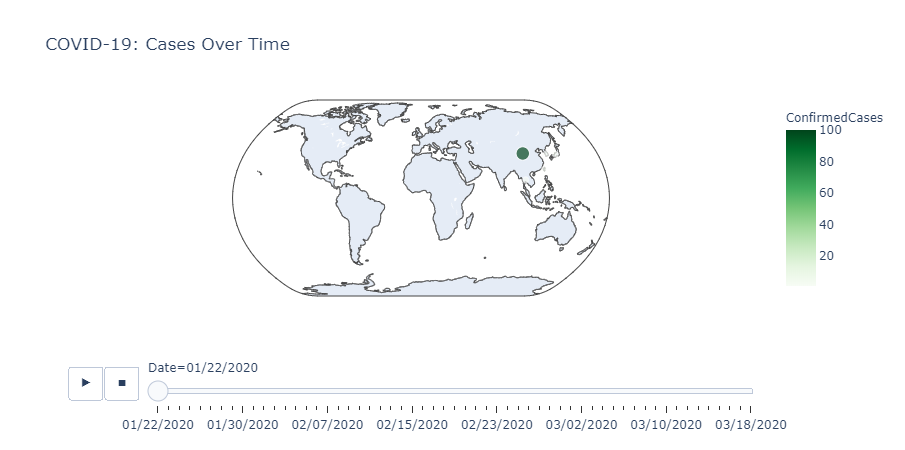

In [6]:
#hide_input
temp = train_df.groupby(['Date', 'Country/Region'])['ConfirmedCases'].sum().reset_index()
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Date'] = temp['Date'].dt.strftime('%m/%d/%Y')
temp['size'] = temp['ConfirmedCases'].pow(0.3) * 3.5

fig = px.scatter_geo(temp, locations="Country/Region", locationmode='country names', 
                     color="ConfirmedCases", size='size', hover_name="Country/Region", 
                     range_color=[1,100],
                     projection="natural earth", animation_frame="Date", 
                     title='COVID-19: Cases Over Time', color_continuous_scale="greens")
fig.show()